In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.preprocessing import FunctionTransformer

In [3]:
df = pd.read_csv('New_Data_FullyCLeaned.csv')

In [5]:
df

,model,location,year,price,mileage,engine_type,transmission
0,Suzuki Mehran VX,Eden Gardens Faisalabad Punjab,2012,700000,100000,Petrol,Manual
1,Toyota Fortuner 27,Kallar Kahar Road Chakwal Punjab,2013,7000000,94000,Petrol,Automatic
2,Suzuki Mehran VX,Muzaffar Gargh Punjab,2015,800000,86000,Petrol,Manual
3,Suzuki MR Wagon,Rafi Qamar Road Bahawalpur Punjab,2011,1300000,97000,Petrol,Automatic
4,Honda BRV iVTEC,Marala Road Sialkot Punjab,2018,3600000,56000,Petrol,Automatic
...,...,...,...,...,...,...,...
17819,Toyota Aqua S,GulistaneJauhar Karachi Sindh,2017,4500000,58000,Hybrid,Automatic
17820,Toyota Prado TX,DHA Defence Lahore Punjab,2007,7500000,150000,Petrol,Automatic
17821,Suzuki Swift DLX,Islamabad Islamabad,2018,2100000,90000,Petrol,Manual
17822,Suzuki Wagon R,Karachi Sindh,2016,1800000,54000,Petrol,Manual


In [6]:
df['engine_type'].unique()

array(['Petrol', 'Diesel', 'Hybrid'], dtype=object)

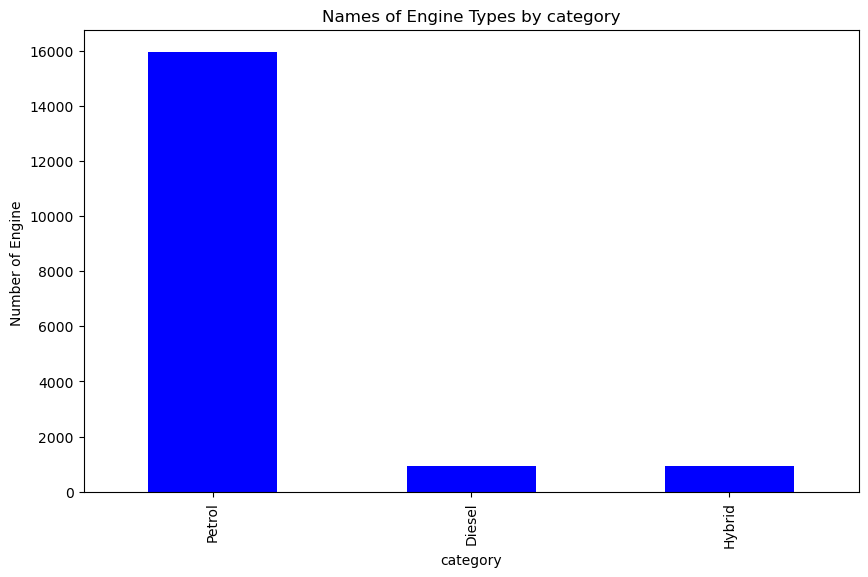

In [7]:
import matplotlib.pyplot as plt
category_mapping_engine_type ={'Petrol':'Petrol','Diesel':'Diesel','Hybrid':'Hybrid'}
category_counts= df [ 'engine_type'].map (category_mapping_engine_type).value_counts()
plt.figure (figsize=(10,6))
category_counts.plot(kind='bar', color='blue')
plt.xlabel('category')
plt.ylabel('Number of Engine ')
plt.title('Names of Engine Types by category')
plt.show()

In [8]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

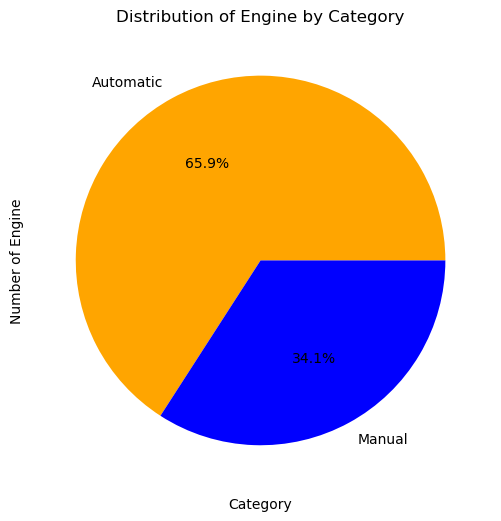

In [19]:

category_mapping_transmission = {'Automatic': 'Automatic', 'Manual': 'Manual'}
category_counts = df['transmission'].map(category_mapping_transmission).value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'blue'])
plt.xlabel('Category')
plt.ylabel('Number of Engine')
plt.title('Distribution of Engine by Category')
plt.show()


In [10]:
df['year'].unique()

array([2012, 2013, 2015, 2011, 2018, 2022, 2004, 2006, 2014, 1999, 2016,
       2007, 2021, 2017, 2020, 2009, 2019, 2003, 1995, 2002, 1997, 2010,
       2008, 2005, 1998, 1992, 2000, 1994, 1990, 1993, 2001, 1996, 1991],
      dtype=int64)

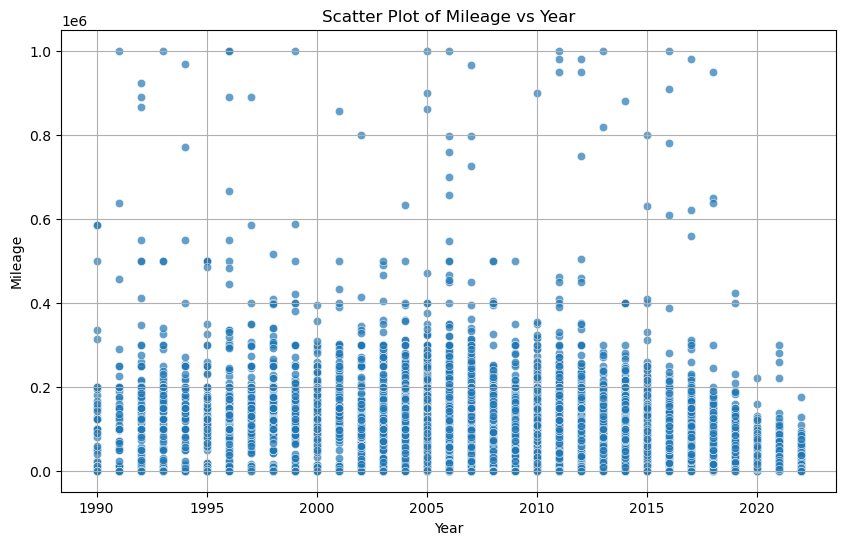

In [11]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(df, x='year', y='mileage', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Mileage')
plt.title('Scatter Plot of Mileage vs Year')
plt.grid(True)
plt.show()

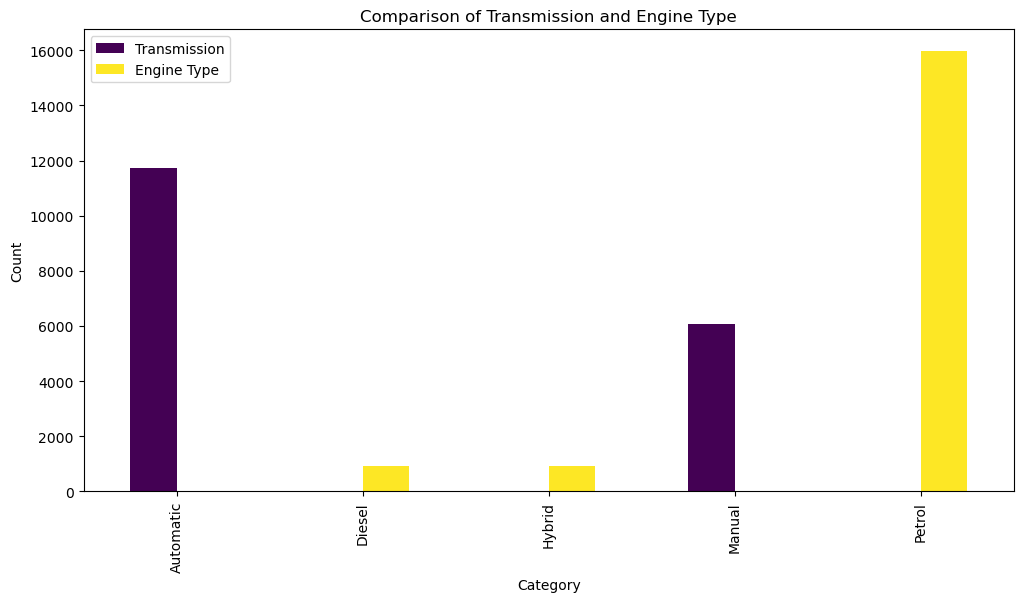

In [12]:
transmission_counts = df['transmission'].value_counts()
engine_type_counts = df['engine_type'].value_counts()

# Combine the data into a single DataFrame
comparison_df = pd.DataFrame({'Transmission': transmission_counts, 'Engine Type': engine_type_counts})

# Plotting grouped bar chart
comparison_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Comparison of Transmission and Engine Type')
plt.show()

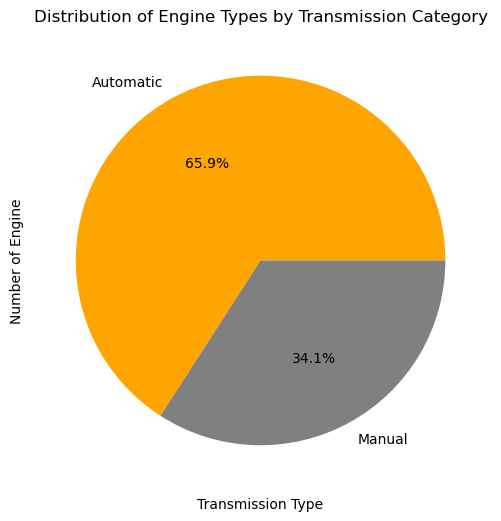

In [13]:
category_mapping_transmission = {'Automatic': 'Automatic', 'Manual': 'Manual'}
category_counts = df['transmission'].map(category_mapping_transmission).value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'grey'])
plt.xlabel('Transmission Type')
plt.ylabel('Number of Engine')
plt.title('Distribution of Engine Types by Transmission Category')
plt.show()

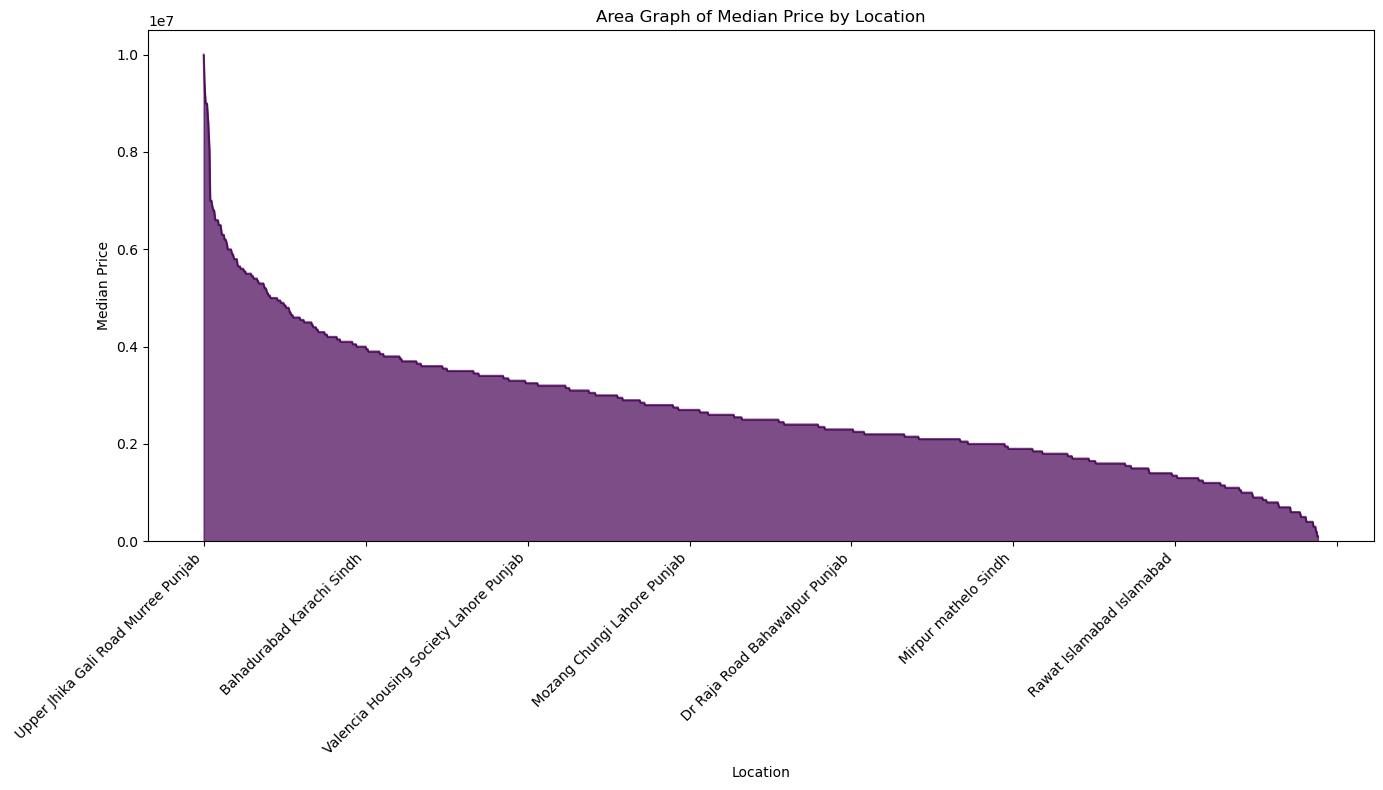

In [14]:
location_price_median = df.groupby('location')['price'].median().sort_values(ascending=False)

# Create an area graph
plt.figure(figsize=(14, 8))
location_price_median.plot(kind='area', alpha=0.7, colormap='viridis')
plt.xlabel('Location')
plt.ylabel('Median Price')
plt.title('Area Graph of Median Price by Location')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

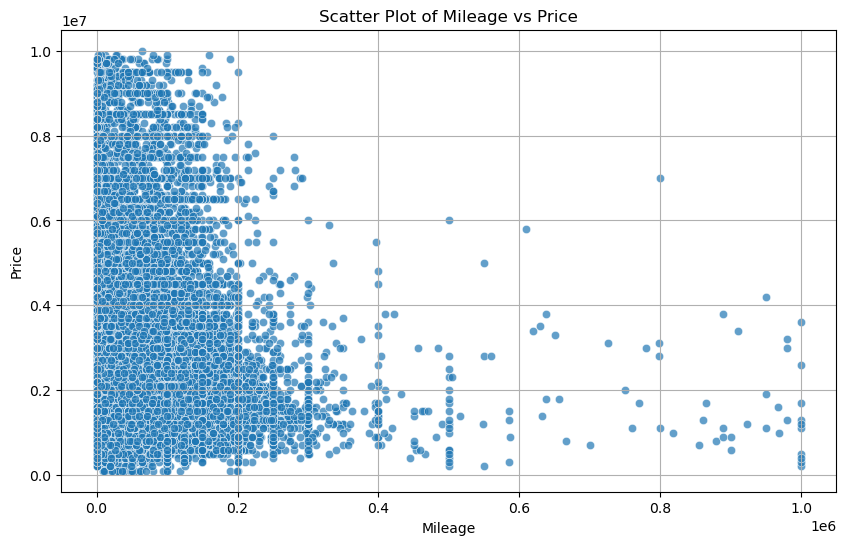

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df, x='mileage', y='price', alpha=0.7)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Scatter Plot of Mileage vs Price')
plt.grid(True)
plt.show()

## Hasing Technique

In [2]:
# Concatenate the text columns into a single column
df['text_combined'] = df['model'] + ' ' + df['location'] + ' ' + df['engine_type'] + ' ' + df['transmission']

X = df[['text_combined']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [3]:
# Define the column transformer with HashingVectorizer
column_trans = make_column_transformer(
    (HashingVectorizer(), 'text_combined'),  # Hashing feature extraction on the combined text
    remainder='passthrough'  # Pass through any non-text columns as they are
)

# Create a pipeline with the column transformer and linear regression
hash_lr_pipe = make_pipeline(
    column_trans,
    LinearRegression()
)

# Fit the pipeline on the training data
hash_lr_pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred_hash = hash_lr_pipe.predict(X_test)

# Evaluate the model performance
r2_hash = r2_score(y_test, y_pred_hash)
print(f'R-squared score with Hashing on the test set: {r2_hash:.2f}')

R-squared score with Hashing on the test set: 0.74


## Naive bayes Algorithm

In [4]:
# Define a function to make input non-negative
def make_non_negative(X):
    return np.abs(X)

# Define the column transformer with HashingVectorizer
column_trans = make_column_transformer(
    (HashingVectorizer(), 'text_combined'),  # Hashing feature extraction on the combined text
    remainder='passthrough'  # Pass through any non-text columns as they are
)

# Create a pipeline with the column transformer, FunctionTransformer, and Naive Bayes
hash_nb_pipe = make_pipeline(
    column_trans,
    FunctionTransformer(func=make_non_negative),  # Ensure non-negative values
    MultinomialNB()  # Multinomial Naive Bayes
)

# Fit the pipeline on the training data
hash_nb_pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred_hash_nb = hash_nb_pipe.predict(X_test)

# Evaluate the model performance
r2_hash_nb = r2_score(y_test, y_pred_hash_nb)
print(f'R-squared score with Hashing and Naive Bayes on the test set: {r2_hash_nb:.2f}')


R-squared score with Hashing and Naive Bayes on the test set: 0.05


## Random Forest Algorithm

In [ ]:
# Define the column transformer with HashingVectorizer
column_trans = make_column_transformer(
    (HashingVectorizer(), 'text_combined'),  # Hashing feature extraction on the combined text
    remainder='passthrough'  # Pass through any non-text columns as they are
)

# Create a pipeline with the column transformer and RandomForestRegressor
hash_rf_pipe = make_pipeline(column_trans, RandomForestRegressor())

# Fit the pipeline on the training data
hash_rf_pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred_hash_rf = hash_rf_pipe.predict(X_test)

# Evaluate the model performance
r2_hash_rf = r2_score(y_test, y_pred_hash_rf)
print(f'R-squared score with Hashing and RandomForestRegressor on the test set: {r2_hash_rf:.2f}')

## SVM Algorithm

In [ ]:
# Define the column transformer with HashingVectorizer
column_trans = make_column_transformer(
    (HashingVectorizer(), 'text_combined'),  # Hashing feature extraction on the combined text
    remainder='passthrough'  # Pass through any non-text columns as they are
)

# Create a pipeline with the column transformer, standard scaler, and SVM regressor
hash_svc_pipe = make_pipeline(
    column_trans,
    StandardScaler(with_mean=False),  # Standardize features by removing the mean and scaling to unit variance
    SVC()  # Support Vector Regression
)

# Fit the pipeline on the training data
hash_svc_pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred_hash_svc = hash_svc_pipe.predict(X_test)

# Evaluate the model performance
r2_hash_svc = r2_score(y_test, y_pred_hash_svc)
print(f'R-squared score with Hashing and SVC on the test set: {r2_hash_svc:.2f}')